In [252]:
# # to load in script (from server): >>> execfile('/home/gm441/python_scripts/DMS_climatologies/run_dms_interp_k11.py')
# # to load in script (from local):  >>> execfile('/Users/gm441/GD/phd/resources/coding/py_repos/dms_climatologies/run_dms_interp_k11.py')

#%%
# # IMPORT MODULES # #

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate as interp
from scipy.stats import truncnorm
from scipy.stats import ttest_ind
import collections as c
import pwlf
import os
import numpy.polynomial.polynomial as poly
from numpy import arange,array,ones,linalg
from pylab import plot,show

#scriptpath = '/Users/gm441/GD/phd/resources/coding/py_repos/observed_data/2020_processing_20-06-13/'
#outpath = '/Users/gm441/GD/phd/resources/coding/py_repos/observed_data/2020_processed/'


## Random sampled from normal distribution
mean=5.5, sd=2.0, low=1.0, upp=70.0

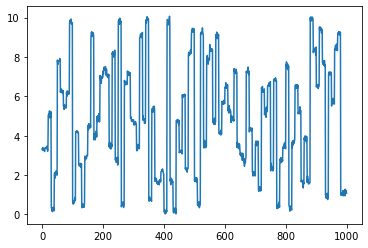

In [443]:
lenth_of_constant=10
no_segments=100
tmp = [get_truncated_normal(mean=x*10.0, sd=mt_stdev, low=0.0, upp=30).rvs(lenth_of_constant) for x in np.random.rand(no_segments)]
tmp2 = np.reshape(tmp,no_segments*lenth_of_constant)
plt.plot(tmp2)
plt.show()


In [452]:
values = [1000]   # # number of data points (tnum)

lenth_of_constant=100
no_segments=np.int(values[0]/lenth_of_constant)

points_before_transition = 20
lenth_of_constant = 100
mt_stdev = 0.1
vlslog_list = []
r2log_list = []
tlog_list = []
plog_list = []

tmp = [get_truncated_normal(mean=x*10.0, sd=mt_stdev, low=0.0, upp=30).rvs(lenth_of_constant) for x in np.random.rand(no_segments)]
rand_dms = np.reshape(tmp,no_segments*lenth_of_constant)

In [453]:
np.shape(rand_dms)

(1000,)

In [456]:

#%%
#values = [10,50,100,300,3000]                                                  # # number of data points (tnum)
values = [10000]   # # number of data points (tnum)

lenth_of_constant=100
no_segments=np.int(values[0]/lenth_of_constant)

points_before_transition = 20
lenth_of_constant = 100
mt_stdev = 0.1
vlslog_list = []
r2log_list = []
tlog_list = []
plog_list = []

datadict = c.OrderedDict()

for value in values:
#    plt.figure()
#    fig = plt.figure()
    tnum = 't_'+str(value)
    datadict[tnum] = {}
    for j in range(1):                                                        # # number of loop repeats (rnum)
        rnum = 'r_'+str(j)
        datadict[tnum][rnum] = {}
# # # ------------------------------------------------------------------------------------------------------------
        # # RANDOM TEST # #
        
        def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
            return truncnorm(
                (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
        
#         dms_range0 = get_truncated_normal(mean=5.5, sd=0.1, low=4.0, upp=7)
#         dms_range = get_truncated_normal(mean=5.5, sd=2.0, low=1.0, upp=70.0)
#         rand_dms = dms_range0.rvs(value/2.0),dms_range.rvs(value/2.0)
        
#         random_no = np.random.rand()*10.0
#         dms_range1 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
# #         dms_range1.rvs(lenth_of_constant)
#         random_no = np.random.rand()*10.0
#         dms_range2 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range3 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range4 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range5 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range6 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range7 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range8 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range9 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
#         random_no = np.random.rand()*10.0
#         dms_range10 = get_truncated_normal(mean=random_no, sd=mt_stdev, low=0.0, upp=30)
# #         dms_range = get_truncated_normal(mean=5.5, sd=2.0, low=1.0, upp=70.0)
# #         rand_dms = dms_range0.rvs(value)
# #         rand_dms = np.concatenate((dms_range0.rvs(points_before_transition),dms_range.rvs(np.int(value-points_before_transition))))
#         rand_dms = np.concatenate((dms_range1.rvs(lenth_of_constant),dms_range2.rvs(lenth_of_constant),dms_range3.rvs(lenth_of_constant),dms_range4.rvs(lenth_of_constant),dms_range5.rvs(lenth_of_constant),dms_range6.rvs(lenth_of_constant),dms_range7.rvs(lenth_of_constant),dms_range8.rvs(lenth_of_constant),dms_range9.rvs(lenth_of_constant),dms_range10.rvs(lenth_of_constant)))
#         rand_dms = np.concatenate((dms_range1.rvs(lenth_of_constant),dms_range2.rvs(lenth_of_constant),dms_range3.rvs(lenth_of_constant),dms_range4.rvs(lenth_of_constant),dms_range5.rvs(lenth_of_constant),dms_range6.rvs(lenth_of_constant),dms_range7.rvs(lenth_of_constant),dms_range8.rvs(lenth_of_constant),dms_range9.rvs(lenth_of_constant),dms_range10.rvs(lenth_of_constant)))
        tmp = [get_truncated_normal(mean=x*10.0, sd=mt_stdev, low=0.0, upp=30).rvs(lenth_of_constant) for x in np.random.rand(no_segments)]
        rand_dms = np.reshape(tmp,no_segments*lenth_of_constant)
    #         rand_dms = np.concatenate((dms_range1.rvs(np.int(value/2.0)),dms_range2.rvs(np.int(value/2.0))))

    #        spatial_res = np.ndarray(value,dtype=float)
#        spatial_res[:] = 1000
        dist_range = get_truncated_normal(mean=1000.0, sd=2.0, low=200.0, upp=3000.0)
#         rand_dist = dist_range.rvs(value)
        rand_dist = np.zeros(value) +1000.0
        data = pd.DataFrame(np.array([rand_dms,rand_dist]).T, columns = ['DMSsw','distance'])
#        data = pd.DataFrame(np.array([rand_dms,spatial_res]).T, columns = ['DMSsw','distance'])
                
# # # ------------------------------------------------------------------------------------------------------------
        # # SET INPUT PARAMETERS & NO. OF BINS # #
        
        DMS = data['DMSsw'].to_numpy()                                                  # # select DMS data column
        dist = (data['distance']/1000.0).to_numpy()                                     # # convert distance between measurements to km
        kmCov = np.cumsum(dist)                                                         # # cumulative transect distance
        maxlen = int(np.max(kmCov))                                                     # # max transect length as an integer
        maxbins = int(maxlen/2.2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        halflen = int(maxlen/2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        interpint = np.arange(1,halflen+2,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)
        interpint = np.arange(1,maxbins+1,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)

# # # ------------------------------------------------------------------------------------------------------------
        # # BIN, INTERPOLATE & MSE # # 
        
        processed = c.OrderedDict()
        processed['bin_sizes'] = float(maxlen)/interpint 
                                       # # no.of values to be averaged into bin
        for i in np.arange(len(interpint))+1:                                           # # for each bin size ( 1 : max km (rounded), every 1 ) (Can't start at bin_0 as 'bins' should be a positive integer, i.e. from bin_1 onward)
#            print i
            bin_number = 'bin_'+str(i)                                                  # # set bin_number as bin_ + i
            bin_dms = []                                                                # # empty temporary array
            bin_dist = []                                                               # # empty temporary array
            tempbin = np.array(pd.cut(data.index, i,labels=range(i)))                   # # temporary array for bin steps based on i in data.index
            for i in np.unique(tempbin):                                                # # for i in bin column values i.e. in bin_44, i = 0-43. Set to unique, to remove repetition of values which fill transect length (0,0,0,1,1,1,2,2,2,3,3,3,4,4,4...43,43,43 etc.)
                bin_dms.append(np.nanmean(DMS[np.where(tempbin == i)].astype('float')))       # # append average DMS values for bin
                bin_dist.append(np.nanmean(kmCov[np.where(tempbin == i)].astype('float')))    # # append average distances for bin
            processed[bin_number] = {}
            processed[bin_number]['dms_mean'] = bin_dms                                 # # bin average DMS
            processed[bin_number]['avdist'] = bin_dist                                  # # bin average distance
        
        print("Transect length:", maxlen, "km")
        print("No. interpolation intervals (BINS):", len(interpint))
        
        MSE = []
        
        for i in np.arange(len(interpint)-1)+2:                                         # # loop through bins 2-end inclusive. Start at bin_2, as can't interpolate the single value in bin_1
            # # INTERPOLATION # #
            x = np.array(processed['bin_'+str(i)]['avdist'])
            y = np.array(processed['bin_'+str(i)]['dms_mean'])                          # # DMS values averaged into bins
            interp_rows = np.where((kmCov > np.nanmin(x)) & (kmCov < np.nanmax(x)))[0]
            f = interp.interp1d(x,y)                                                    # # new function interpolate x & y
            DISTinterp = kmCov[interp_rows]
            DMSinterp = f(DISTinterp)                                                   # # use interpolation function returned by 'interp1d'
            # # MEAN SQUARED ERROR # #
            mse = np.nanmean((DMS[interp_rows] - DMSinterp)**2)                                      # # (dms original - dms intp) squared, then averaged to get one value per bin.
            MSE.append(mse)                                                             # # append to list for all bins
#            print 'Bin_',str(i), 'MSE', mse

#        plt.figure()
#        plt.scatter(kmCov,DMS, color = 'g', label = 'Observed', alpha = 0.5)
#        plt.scatter(DISTinterp,DMSinterp, label = bin_number + 'Interpolated', alpha = 0.5)
#        plt.xlabel('Distance (km)')
#        plt.ylabel('DMS (nM)')
#        plt.grid(b=None, which='major', axis='both')
#        plt.legend()
#        plt.show(block=False)
        
# # # ------------------------------------------------------------------------------------------------------------
        # # PIECEWISE LINEAR REGRESSION - LINEAR # #
        
        d = processed['bin_sizes'][1:]                                                  # # bin_sizes (minus the last value, as bin_1 not included)
        e = np.array(MSE[:])                                                                         # # mse values for bin_2 to bin_max
        space_lin = np.linspace(d.min(), d.max(), 1000)                                 # # new temp variable for an arbritrary 1000 points, linearly spaced between bin SIZES bin_2 and bin_max         
        my_pwlf = pwlf.PiecewiseLinFit(d, e)                                            # # use pwlf function PiecewiseLinFit
        
        # # FOR TRUNCATED VLS # #
        #u = d[0:507]                                           # # 197 for 20 km, 297 for 30 km, 397 for 40 km, 497 for 50 km, 997 for 100 km (507 for 51km)
        #v = e[0:507]
        #space_lin = np.linspace(u.min(), u.max(), 1000)                                # # for trunctated VLS
        #my_pwlf = pwlf.PiecewiseLinFit(u, v)                                           # # use pwlf function PiecewiseLinFit
        
        vls = my_pwlf.fit(2)                                                            # # find fit with prescribed no. of segments (x) (no. segments = no. inflections +1)
        pwlr = my_pwlf.predict(space_lin)                                               # # predicted PWLR
        
        print('linear VLS = ', vls[1])
        
        # # Get the slopes
        slopes = my_pwlf.calc_slopes()                                                  # # slope gradients of the two segmented linear regressions
        # # Get my model parameters
        Beta = my_pwlf.beta                                                             # # 3 beta values for the regressions
        # # Calculate the standard errors associated with each beta parameter
        se = my_pwlf.standard_errors()                                                  # # standard error for each beta parameter
        # # Calculate the R^2 value
        rsq = my_pwlf.r_squared()                                                       # # r squared value for the full regression
        
        # calculate the piecewise R^2 value
        R2values = np.zeros(my_pwlf.n_segments)
        for i in range(my_pwlf.n_segments):
            # segregate the data based on break point locations
            xmin = my_pwlf.fit_breaks[i]
            xmax = my_pwlf.fit_breaks[i+1]
            xtemp = my_pwlf.x_data
            ytemp = my_pwlf.y_data
            indtemp = np.where(xtemp >= xmin)
            xtemp = my_pwlf.x_data[indtemp]
            ytemp = my_pwlf.y_data[indtemp]
            indtemp = np.where(xtemp <= xmax)
            xtemp = xtemp[indtemp]
            ytemp = ytemp[indtemp]
        
            # predict for the new data
            yhattemp = my_pwlf.predict(xtemp)
        
            # calculate ssr
            E = yhattemp - ytemp                                                        # # residual vector
            ssr = np.dot(E, E)                                                          # # sum-of-squares of the residuals
        
            # calculate sst
            ybar = np.ones(ytemp.size) * np.mean(ytemp)                                 # # ybar = mean of vector y
            ydiff = ytemp - ybar
            sst = np.dot(ydiff, ydiff)                                                  # # total sum-of-squares
        
            R2values[i] = 1.0 - (ssr/sst)                                               # # coefficient of determination (R2)
        
        print('Segment R-squared values = ', R2values)
        
        datadict[tnum][rnum]['bin_sizes'] = d
        datadict[tnum][rnum]['mse'] = e
        datadict[tnum][rnum]['space_lin'] = space_lin
        datadict[tnum][rnum]['pwlr'] = pwlr
        datadict[tnum][rnum]['vls'] = vls
        datadict[tnum][rnum]['dms'] = rand_dms

# # # ------------------------------------------------------------------------------------------------------------
        # # Find y (MSE) intercept at inflection point in PWLR - LINEAR # #
        
#        def find_nearest(array, value):
#            array = np.asarray(array)
#            idx = (np.abs(array - value)).argmin()
#            return array[idx]
#        
#        # # For 1st of ... inflections
#        inflec1 = find_nearest(space_lin, vls[1])
#        inflec1_index = list(space_lin).index(inflec1)
#        mse_intcpt1 = pwlr[inflec1_index]
#        print mse_intcpt1
#        
#        # # For 2nd of ... inflections
#        if len(vls) > 3:
#            inflec2 = find_nearest(space_lin, vls[2])
#            inflec2_index = list(space_lin).index(inflec2)
#            mse_intcpt2 = pwlr[inflec2_index]
#            print mse_intcpt2
#        else:
#            print 'Only 1 inflection'
        
# # # ------------------------------------------------------------------------------------------------------------
        # # Test significance of difference between the slopes (t-test & p-value) - LINEAR # #
        
#        # # For ONE inflection # #
#        if len(vls) <= 3:
#            a = pwlr[0:inflec1_index]
#            b = pwlr[inflec1_index:]
#            
#            t, p = ttest_ind(a, b, equal_var=False)
#            print 'One Inflection'
#            print("ttest_ind:            t = %g  p = %g" % (t, p))
#            if p < 0.05:
#                print 'SIGNIFICANT'
#            else:
#                print 'NOT SIGNIFICANT'
        
            # # VLS LINEAR SPACING # #
            
        d1 = np.log(d)
        e1 = np.log(e)
        
        z1 = np.polyfit(d1, e1, 4)
        fp1 = np.poly1d(z1)
        
        xnew1 = np.linspace(d1.min(), d1.max(), 1000)
        ynew1 = fp1(xnew1)

        my_pwlf1 = pwlf.PiecewiseLinFit(d1, e1)
        vls1 = my_pwlf1.fit(2)                                                          
        pwlr1 = my_pwlf1.predict(xnew1)                                            
        vls_inv = np.exp(vls1)
        
        #---------------------------------------------

        coefs = poly.polyfit(d1, e1, 4)
        ffit = poly.polyval(xnew1, coefs)
        
        #---------------------------------------------
        
        pwrbase = -1.5
        
        d2 = np.power(d,pwrbase)
        e2 = np.power(e,pwrbase)

        z2 = np.polyfit(d2, e2, 1)
        fp2 = np.poly1d(z2)
        
        xnew2 = np.linspace(d2.min(), d2.max(), 1000)
        ynew2 = fp2(xnew2)

        my_pwlf2 = pwlf.PiecewiseLinFit(d2, e2)
        vls2 = my_pwlf2.fit(2)                                                          
        pwlr2 = my_pwlf2.predict(xnew2)                                            
        vls_pinv = np.power(vls2,(1.0/pwrbase))
        
        datadict[tnum][rnum]['bin_sizes_log'] = d1
        datadict[tnum][rnum]['mse_log'] = e1
        datadict[tnum][rnum]['space_log'] = xnew1
        datadict[tnum][rnum]['pwlr_log'] = pwlr1
        datadict[tnum][rnum]['vls_log'] = vls1
        datadict[tnum][rnum]['vls_inv'] = vls_inv

        datadict[tnum][rnum]['bin_sizes_pwr'] = d2
        datadict[tnum][rnum]['mse_pwr'] = e2
        datadict[tnum][rnum]['space_pwr'] = xnew2
        datadict[tnum][rnum]['linfit_pwr'] = ynew2
        datadict[tnum][rnum]['pwlr_pwr'] = pwlr2
        datadict[tnum][rnum]['vls_pwr'] = vls2
        datadict[tnum][rnum]['vls_pinv'] = vls_pinv
        



Transect length: 10000 km
No. interpolation intervals (BINS): 4545
linear VLS =  233.83523097197371
Segment R-squared values =  [0.988314   0.48454784]


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/pwlf/pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \


In [531]:


def vls(value,lenth_of_constant,mt_stdev):
    no_segments=np.int(value/lenth_of_constant)
    
        #%%
    #values = [10,50,100,300,3000]                                                  # # number of data points (tnum)

    vlslog_list = []
    r2log_list = []
    tlog_list = []
    plog_list = []

    datadict = c.OrderedDict()


    #    plt.figure()
    #    fig = plt.figure()
    tnum = 't_'+str(value)
    datadict[tnum] = {}
    for j in range(1):                                                        # # number of loop repeats (rnum)
        rnum = 'r_'+str(j)
        datadict[tnum][rnum] = {}
    # # # ------------------------------------------------------------------------------------------------------------
        # # RANDOM TEST # #

        def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
            return truncnorm(
                (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

        tmp = [get_truncated_normal(mean=x*10.0, sd=mt_stdev, low=0.0, upp=30).rvs(lenth_of_constant) for x in np.random.rand(no_segments)]
        rand_dms = np.reshape(tmp,no_segments*lenth_of_constant)

        dist_range = get_truncated_normal(mean=1000.0, sd=2.0, low=200.0, upp=3000.0)
    #         rand_dist = dist_range.rvs(value)
        rand_dist = np.zeros(value) +1000.0
        data = pd.DataFrame(np.array([rand_dms,rand_dist]).T, columns = ['DMSsw','distance'])
    #        data = pd.DataFrame(np.array([rand_dms,spatial_res]).T, columns = ['DMSsw','distance'])

    # # # ------------------------------------------------------------------------------------------------------------
        # # SET INPUT PARAMETERS & NO. OF BINS # #

        DMS = data['DMSsw'].to_numpy()                                                  # # select DMS data column
        dist = (data['distance']/1000.0).to_numpy()                                     # # convert distance between measurements to km
        kmCov = np.cumsum(dist)                                                         # # cumulative transect distance
        maxlen = int(np.max(kmCov))                                                     # # max transect length as an integer
        maxbins = int(maxlen/2.2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
    #        halflen = int(maxlen/2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
    #        interpint = np.arange(1,halflen+2,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)
        interpint = np.arange(1,maxbins+1,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)

    # # # ------------------------------------------------------------------------------------------------------------
        # # BIN, INTERPOLATE & MSE # # 

        processed = c.OrderedDict()
        processed['bin_sizes'] = float(maxlen)/interpint 
                                       # # no.of values to be averaged into bin
        for i in np.arange(len(interpint))+1:                                           # # for each bin size ( 1 : max km (rounded), every 1 ) (Can't start at bin_0 as 'bins' should be a positive integer, i.e. from bin_1 onward)
    #            print i
            bin_number = 'bin_'+str(i)                                                  # # set bin_number as bin_ + i
            bin_dms = []                                                                # # empty temporary array
            bin_dist = []                                                               # # empty temporary array
            tempbin = np.array(pd.cut(data.index, i,labels=range(i)))                   # # temporary array for bin steps based on i in data.index
            for i in np.unique(tempbin):                                                # # for i in bin column values i.e. in bin_44, i = 0-43. Set to unique, to remove repetition of values which fill transect length (0,0,0,1,1,1,2,2,2,3,3,3,4,4,4...43,43,43 etc.)
                bin_dms.append(np.nanmean(DMS[np.where(tempbin == i)].astype('float')))       # # append average DMS values for bin
                bin_dist.append(np.nanmean(kmCov[np.where(tempbin == i)].astype('float')))    # # append average distances for bin
            processed[bin_number] = {}
            processed[bin_number]['dms_mean'] = bin_dms                                 # # bin average DMS
            processed[bin_number]['avdist'] = bin_dist                                  # # bin average distance

        print("Transect length:", maxlen, "km")
        print("No. interpolation intervals (BINS):", len(interpint))

        MSE = []

        for i in np.arange(len(interpint)-1)+2:                                         # # loop through bins 2-end inclusive. Start at bin_2, as can't interpolate the single value in bin_1
            # # INTERPOLATION # #
            x = np.array(processed['bin_'+str(i)]['avdist'])
            y = np.array(processed['bin_'+str(i)]['dms_mean'])                          # # DMS values averaged into bins
            interp_rows = np.where((kmCov > np.nanmin(x)) & (kmCov < np.nanmax(x)))[0]
            f = interp.interp1d(x,y)                                                    # # new function interpolate x & y
            DISTinterp = kmCov[interp_rows]
            DMSinterp = f(DISTinterp)                                                   # # use interpolation function returned by 'interp1d'
            # # MEAN SQUARED ERROR # #
            mse = np.nanmean((DMS[interp_rows] - DMSinterp)**2)                                      # # (dms original - dms intp) squared, then averaged to get one value per bin.
            MSE.append(mse)                                                             # # append to list for all bins

    # # # ------------------------------------------------------------------------------------------------------------
        # # PIECEWISE LINEAR REGRESSION - LINEAR # #

        d = processed['bin_sizes'][1:]                                                  # # bin_sizes (minus the last value, as bin_1 not included)
        e = np.array(MSE[:])                                                                         # # mse values for bin_2 to bin_max
        space_lin = np.linspace(d.min(), d.max(), 1000)                                 # # new temp variable for an arbritrary 1000 points, linearly spaced between bin SIZES bin_2 and bin_max         
        my_pwlf = pwlf.PiecewiseLinFit(d, e)                                            # # use pwlf function PiecewiseLinFit

        # # FOR TRUNCATED VLS # #
        #u = d[0:507]                                           # # 197 for 20 km, 297 for 30 km, 397 for 40 km, 497 for 50 km, 997 for 100 km (507 for 51km)
        #v = e[0:507]
        #space_lin = np.linspace(u.min(), u.max(), 1000)                                # # for trunctated VLS
        #my_pwlf = pwlf.PiecewiseLinFit(u, v)                                           # # use pwlf function PiecewiseLinFit

        vls = my_pwlf.fit(2)                                                            # # find fit with prescribed no. of segments (x) (no. segments = no. inflections +1)
        pwlr = my_pwlf.predict(space_lin)                                               # # predicted PWLR

        print('linear VLS = ', vls[1])

        # # Get the slopes
        slopes = my_pwlf.calc_slopes()                                                  # # slope gradients of the two segmented linear regressions
        # # Get my model parameters
        Beta = my_pwlf.beta                                                             # # 3 beta values for the regressions
        # # Calculate the standard errors associated with each beta parameter
        se = my_pwlf.standard_errors()                                                  # # standard error for each beta parameter
        # # Calculate the R^2 value
        rsq = my_pwlf.r_squared()                                                       # # r squared value for the full regression

        # calculate the piecewise R^2 value
        R2values = np.zeros(my_pwlf.n_segments)
        for i in range(my_pwlf.n_segments):
            # segregate the data based on break point locations
            xmin = my_pwlf.fit_breaks[i]
            xmax = my_pwlf.fit_breaks[i+1]
            xtemp = my_pwlf.x_data
            ytemp = my_pwlf.y_data
            indtemp = np.where(xtemp >= xmin)
            xtemp = my_pwlf.x_data[indtemp]
            ytemp = my_pwlf.y_data[indtemp]
            indtemp = np.where(xtemp <= xmax)
            xtemp = xtemp[indtemp]
            ytemp = ytemp[indtemp]

            # predict for the new data
            yhattemp = my_pwlf.predict(xtemp)

            # calculate ssr
            E = yhattemp - ytemp                                                        # # residual vector
            ssr = np.dot(E, E)                                                          # # sum-of-squares of the residuals

            # calculate sst
            ybar = np.ones(ytemp.size) * np.mean(ytemp)                                 # # ybar = mean of vector y
            ydiff = ytemp - ybar
            sst = np.dot(ydiff, ydiff)                                                  # # total sum-of-squares

            R2values[i] = 1.0 - (ssr/sst)                                               # # coefficient of determination (R2)

        print('Segment R-squared values = ', R2values)

   

        d1 = np.log(d)
        e1 = np.log(e)

        z1 = np.polyfit(d1, e1, 4)
        fp1 = np.poly1d(z1)

        xnew1 = np.linspace(d1.min(), d1.max(), 1000)
        ynew1 = fp1(xnew1)

        my_pwlf1 = pwlf.PiecewiseLinFit(d1, e1)
        vls1 = my_pwlf1.fit(2)                                                          
        pwlr1 = my_pwlf1.predict(xnew1)                                            
        vls_inv = np.exp(vls1)

        #---------------------------------------------

        coefs = poly.polyfit(d1, e1, 4)
        ffit = poly.polyval(xnew1, coefs)

        #---------------------------------------------

        pwrbase = -1.5

        d2 = np.power(d,pwrbase)
        e2 = np.power(e,pwrbase)

        z2 = np.polyfit(d2, e2, 1)
        fp2 = np.poly1d(z2)

        xnew2 = np.linspace(d2.min(), d2.max(), 1000)
        ynew2 = fp2(xnew2)

        my_pwlf2 = pwlf.PiecewiseLinFit(d2, e2)
        vls2 = my_pwlf2.fit(2)                                                          
        pwlr2 = my_pwlf2.predict(xnew2)                                            
        vls_pinv = np.power(vls2,(1.0/pwrbase))
    
        datadict[tnum][rnum]['bin_sizes'] = d
        datadict[tnum][rnum]['mse'] = e
        datadict[tnum][rnum]['space_lin'] = space_lin
        datadict[tnum][rnum]['pwlr'] = pwlr
        datadict[tnum][rnum]['vls'] = vls
        datadict[tnum][rnum]['dms'] = rand_dms

        datadict[tnum][rnum]['bin_sizes_log'] = d1
        datadict[tnum][rnum]['mse_log'] = e1
        datadict[tnum][rnum]['space_log'] = xnew1
        datadict[tnum][rnum]['pwlr_log'] = pwlr1
        datadict[tnum][rnum]['vls_log'] = vls1
        datadict[tnum][rnum]['vls_inv'] = vls_inv

        datadict[tnum][rnum]['bin_sizes_pwr'] = d2
        datadict[tnum][rnum]['mse_pwr'] = e2
        datadict[tnum][rnum]['space_pwr'] = xnew2
        datadict[tnum][rnum]['linfit_pwr'] = ynew2
        datadict[tnum][rnum]['pwlr_pwr'] = pwlr2
        datadict[tnum][rnum]['vls_pwr'] = vls2
        datadict[tnum][rnum]['vls_pinv'] = vls_pinv
        
        return datadict[tnum][rnum]['dms'],datadict[tnum][rnum]['bin_sizes'], datadict[tnum][rnum]['mse'],datadict[tnum][rnum]['bin_sizes_log'], datadict[tnum][rnum]['mse_log']
    
    
def plot_vls_data(dms,bin_sizes,mse,bin_sizes_log,mse_log,lenth_of_constant,out_file_name):

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

    ax1.plot(dms, '-', alpha=0.7)

    ax2.plot(bin_sizes,mse, 'o', alpha=0.5)
    #     ax2.plot(np.flip(datadict[tnum][rnum]['mse']), '+', alpha=0.9)

    #     ax2.plot(datadict[tnum][rnum]['space_lin'], datadict[tnum][rnum]['pwlr'], '-', color='k', alpha=0.7)

    ax3.plot(bin_sizes_log,mse_log, 'o', alpha=0.5)
    #     ax2.plot(datadict[tnum][rnum]['space_log'], datadict[tnum][rnum]['pwlr_log'], '-', color='k', alpha=0.7)

    # Linear fit to first half of data
    xi = bin_sizes_log
    loc = np.where(bin_sizes_log < (np.max(bin_sizes_log)/2.0))[0]
    xi = xi[loc]
    A = array([ xi, ones(len(xi))])
    # linearly generated sequence
    y = mse_log[loc]
    w = linalg.lstsq(A.T,y)[0]
    # obtaining the parameters
    # plotting the line
    line = w[0]*bin_sizes_log+w[1]
    # regression line
    #     plot(xi,y,'o')
    ax3.plot(bin_sizes_log,line,'r-')
    
    ymin, ymax = ax3.get_ylim()
    # Plot the actialt VLS value as defined when producing the input data
    ax3.plot([np.log(lenth_of_constant),np.log(lenth_of_constant)],[ymin, ymax],'k')


    xmin, xmax = ax3.get_xlim()
    xticks = np.linspace(xmin,xmax,5)
    ax3.set_xticks(xticks)
    ax3.set_xticklabels(np.exp(xticks).round(2))

    ymin, ymax = ax3.get_ylim()
    yticks = np.linspace(ymin,ymax,5)
    ax3.set_yticks(yticks)
    ax3.set_yticklabels(np.exp(yticks).round(2)) 


    ax1.set_xlabel('distance along transect, km')
    ax1.set_ylabel("DMS 'measurement'")

    ax2.set_xlabel('Bin size')
    ax2.set_ylabel('Mean Squared Error')
    ax2.set_title(' Linear data')

    ax3.set_title('N=' + str(len(dist)) + ' Linear data')
    ax3.set_title(' Log-transformed data')

    ax3.grid(b=None, which='both', axis='both')
    ax3.grid(b=None, which='both', axis='both')


    plt.savefig(out_file_name)

    
    

Transect length: 1000 km
No. interpolation intervals (BINS): 454
linear VLS =  5.576534052237257
Segment R-squared values =  [0.92269682 0.97974966]


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/pwlf/pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \
<ipython-input-531-7b668ea33df0>:230: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = linalg.lstsq(A.T,y)[0]


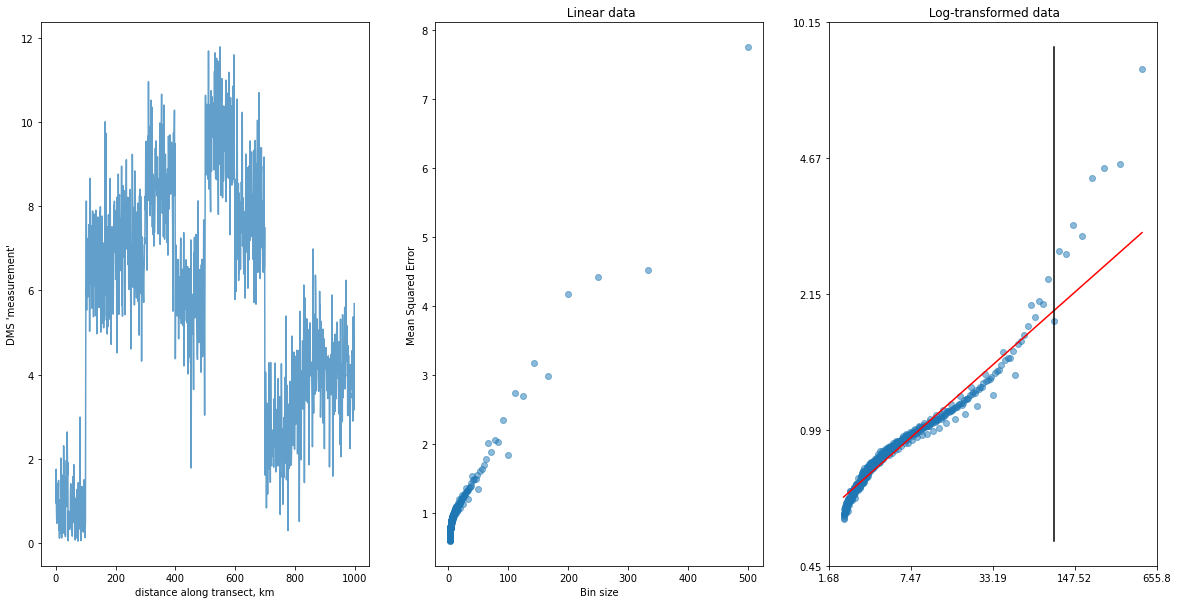

In [532]:
value = 1000   # # number of data points (tnum)
lenth_of_constant=100
mt_stdev = 1.0

dms,bin_sizes,mse,bin_sizes_log,mse_log = vls(value,lenth_of_constant,mt_stdev)

plot_vls_data(dms,bin_sizes,mse,bin_sizes_log,mse_log,lenth_of_constant,'/Users/ph290/Downloads/for_george5.png')

In [479]:
loc

array([ 140,  141,  142, ..., 4541, 4542, 4543])

## totally random data

In [255]:

#%%
#values = [10,50,100,300,3000]                                                  # # number of data points (tnum)
values = [300]                                                                  # # number of data points (tnum)
vlslog_list = []
r2log_list = []
tlog_list = []
plog_list = []

datadict = c.OrderedDict()

for value in values:
#    plt.figure()
#    fig = plt.figure()
    tnum = 't_'+str(value)
    datadict[tnum] = {}
    for j in range(10):                                                        # # number of loop repeats (rnum)
        rnum = 'r_'+str(j)
        datadict[tnum][rnum] = {}
# # # ------------------------------------------------------------------------------------------------------------
        # # RANDOM TEST # #
        
        def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
            return truncnorm(
                (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
        
        dms_range = get_truncated_normal(mean=0.75, sd=2.0, low=1.0, upp=70.0)
        rand_dms = dms_range.rvs(value)

#        spatial_res = np.ndarray(value,dtype=float)
#        spatial_res[:] = 1000
        dist_range = get_truncated_normal(mean=1000.0, sd=2.0, low=200.0, upp=3000.0)
        rand_dist = dist_range.rvs(value)
        
        data = pd.DataFrame(np.array([rand_dms,rand_dist]).T, columns = ['DMSsw','distance'])
#        data = pd.DataFrame(np.array([rand_dms,spatial_res]).T, columns = ['DMSsw','distance'])
                
# # # ------------------------------------------------------------------------------------------------------------
        # # SET INPUT PARAMETERS & NO. OF BINS # #
        
        DMS = data['DMSsw'].to_numpy()                                                  # # select DMS data column
        dist = (data['distance']/1000.0).to_numpy()                                     # # convert distance between measurements to km
        kmCov = np.cumsum(dist)                                                         # # cumulative transect distance
        maxlen = int(np.max(kmCov))                                                     # # max transect length as an integer
        maxbins = int(maxlen/2.2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        halflen = int(maxlen/2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        interpint = np.arange(1,halflen+2,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)
        interpint = np.arange(1,maxbins+1,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)

# # # ------------------------------------------------------------------------------------------------------------
        # # BIN, INTERPOLATE & MSE # # 
        
        processed = c.OrderedDict()
        processed['bin_sizes'] = float(maxlen)/interpint 
                                       # # no.of values to be averaged into bin
        for i in np.arange(len(interpint))+1:                                           # # for each bin size ( 1 : max km (rounded), every 1 ) (Can't start at bin_0 as 'bins' should be a positive integer, i.e. from bin_1 onward)
#            print i
            bin_number = 'bin_'+str(i)                                                  # # set bin_number as bin_ + i
            bin_dms = []                                                                # # empty temporary array
            bin_dist = []                                                               # # empty temporary array
            tempbin = np.array(pd.cut(data.index, i,labels=range(i)))                   # # temporary array for bin steps based on i in data.index
            for i in np.unique(tempbin):                                                # # for i in bin column values i.e. in bin_44, i = 0-43. Set to unique, to remove repetition of values which fill transect length (0,0,0,1,1,1,2,2,2,3,3,3,4,4,4...43,43,43 etc.)
                bin_dms.append(np.nanmean(DMS[np.where(tempbin == i)].astype('float')))       # # append average DMS values for bin
                bin_dist.append(np.nanmean(kmCov[np.where(tempbin == i)].astype('float')))    # # append average distances for bin
            processed[bin_number] = {}
            processed[bin_number]['dms_mean'] = bin_dms                                 # # bin average DMS
            processed[bin_number]['avdist'] = bin_dist                                  # # bin average distance
        
        print("Transect length:", maxlen, "km")
        print("No. interpolation intervals (BINS):", len(interpint))
        
        MSE = []
        
        for i in np.arange(len(interpint)-1)+2:                                         # # loop through bins 2-end inclusive. Start at bin_2, as can't interpolate the single value in bin_1
            # # INTERPOLATION # #
            x = np.array(processed['bin_'+str(i)]['avdist'])
            y = np.array(processed['bin_'+str(i)]['dms_mean'])                          # # DMS values averaged into bins
            interp_rows = np.where((kmCov > np.nanmin(x)) & (kmCov < np.nanmax(x)))[0]
            f = interp.interp1d(x,y)                                                    # # new function interpolate x & y
            DISTinterp = kmCov[interp_rows]
            DMSinterp = f(DISTinterp)                                                   # # use interpolation function returned by 'interp1d'
            # # MEAN SQUARED ERROR # #
            mse = np.nanmean((DMS[interp_rows] - DMSinterp)**2)                                      # # (dms original - dms intp) squared, then averaged to get one value per bin.
            MSE.append(mse)                                                             # # append to list for all bins
#            print 'Bin_',str(i), 'MSE', mse

#        plt.figure()
#        plt.scatter(kmCov,DMS, color = 'g', label = 'Observed', alpha = 0.5)
#        plt.scatter(DISTinterp,DMSinterp, label = bin_number + 'Interpolated', alpha = 0.5)
#        plt.xlabel('Distance (km)')
#        plt.ylabel('DMS (nM)')
#        plt.grid(b=None, which='major', axis='both')
#        plt.legend()
#        plt.show(block=False)
        
# # # ------------------------------------------------------------------------------------------------------------
        # # PIECEWISE LINEAR REGRESSION - LINEAR # #
        
        d = processed['bin_sizes'][1:]                                                  # # bin_sizes (minus the last value, as bin_1 not included)
        e = np.array(MSE[:])                                                                         # # mse values for bin_2 to bin_max
        space_lin = np.linspace(d.min(), d.max(), 1000)                                 # # new temp variable for an arbritrary 1000 points, linearly spaced between bin SIZES bin_2 and bin_max         
        my_pwlf = pwlf.PiecewiseLinFit(d, e)                                            # # use pwlf function PiecewiseLinFit
        
        # # FOR TRUNCATED VLS # #
        #u = d[0:507]                                           # # 197 for 20 km, 297 for 30 km, 397 for 40 km, 497 for 50 km, 997 for 100 km (507 for 51km)
        #v = e[0:507]
        #space_lin = np.linspace(u.min(), u.max(), 1000)                                # # for trunctated VLS
        #my_pwlf = pwlf.PiecewiseLinFit(u, v)                                           # # use pwlf function PiecewiseLinFit
        
        vls = my_pwlf.fit(2)                                                            # # find fit with prescribed no. of segments (x) (no. segments = no. inflections +1)
        pwlr = my_pwlf.predict(space_lin)                                               # # predicted PWLR
        
        print('linear VLS = ', vls[1])
        
        # # Get the slopes
        slopes = my_pwlf.calc_slopes()                                                  # # slope gradients of the two segmented linear regressions
        # # Get my model parameters
        Beta = my_pwlf.beta                                                             # # 3 beta values for the regressions
        # # Calculate the standard errors associated with each beta parameter
        se = my_pwlf.standard_errors()                                                  # # standard error for each beta parameter
        # # Calculate the R^2 value
        rsq = my_pwlf.r_squared()                                                       # # r squared value for the full regression
        
        # calculate the piecewise R^2 value
        R2values = np.zeros(my_pwlf.n_segments)
        for i in range(my_pwlf.n_segments):
            # segregate the data based on break point locations
            xmin = my_pwlf.fit_breaks[i]
            xmax = my_pwlf.fit_breaks[i+1]
            xtemp = my_pwlf.x_data
            ytemp = my_pwlf.y_data
            indtemp = np.where(xtemp >= xmin)
            xtemp = my_pwlf.x_data[indtemp]
            ytemp = my_pwlf.y_data[indtemp]
            indtemp = np.where(xtemp <= xmax)
            xtemp = xtemp[indtemp]
            ytemp = ytemp[indtemp]
        
            # predict for the new data
            yhattemp = my_pwlf.predict(xtemp)
        
            # calculate ssr
            E = yhattemp - ytemp                                                        # # residual vector
            ssr = np.dot(E, E)                                                          # # sum-of-squares of the residuals
        
            # calculate sst
            ybar = np.ones(ytemp.size) * np.mean(ytemp)                                 # # ybar = mean of vector y
            ydiff = ytemp - ybar
            sst = np.dot(ydiff, ydiff)                                                  # # total sum-of-squares
        
            R2values[i] = 1.0 - (ssr/sst)                                               # # coefficient of determination (R2)
        
        print('Segment R-squared values = ', R2values)
        
        datadict[tnum][rnum]['bin_sizes'] = d
        datadict[tnum][rnum]['mse'] = e
        datadict[tnum][rnum]['space_lin'] = space_lin
        datadict[tnum][rnum]['pwlr'] = pwlr
        datadict[tnum][rnum]['vls'] = vls

# # # ------------------------------------------------------------------------------------------------------------
        # # Find y (MSE) intercept at inflection point in PWLR - LINEAR # #
        
#        def find_nearest(array, value):
#            array = np.asarray(array)
#            idx = (np.abs(array - value)).argmin()
#            return array[idx]
#        
#        # # For 1st of ... inflections
#        inflec1 = find_nearest(space_lin, vls[1])
#        inflec1_index = list(space_lin).index(inflec1)
#        mse_intcpt1 = pwlr[inflec1_index]
#        print mse_intcpt1
#        
#        # # For 2nd of ... inflections
#        if len(vls) > 3:
#            inflec2 = find_nearest(space_lin, vls[2])
#            inflec2_index = list(space_lin).index(inflec2)
#            mse_intcpt2 = pwlr[inflec2_index]
#            print mse_intcpt2
#        else:
#            print 'Only 1 inflection'
        
# # # ------------------------------------------------------------------------------------------------------------
        # # Test significance of difference between the slopes (t-test & p-value) - LINEAR # #
        
#        # # For ONE inflection # #
#        if len(vls) <= 3:
#            a = pwlr[0:inflec1_index]
#            b = pwlr[inflec1_index:]
#            
#            t, p = ttest_ind(a, b, equal_var=False)
#            print 'One Inflection'
#            print("ttest_ind:            t = %g  p = %g" % (t, p))
#            if p < 0.05:
#                print 'SIGNIFICANT'
#            else:
#                print 'NOT SIGNIFICANT'
        
            # # VLS LINEAR SPACING # #
            
        d1 = np.log(d)
        e1 = np.log(e)
        
        z1 = np.polyfit(d1, e1, 4)
        fp1 = np.poly1d(z1)
        
        xnew1 = np.linspace(d1.min(), d1.max(), 1000)
        ynew1 = fp1(xnew1)

        my_pwlf1 = pwlf.PiecewiseLinFit(d1, e1)
        vls1 = my_pwlf1.fit(2)                                                          
        pwlr1 = my_pwlf1.predict(xnew1)                                            
        vls_inv = np.exp(vls1)
        
        #---------------------------------------------

        coefs = poly.polyfit(d1, e1, 4)
        ffit = poly.polyval(xnew1, coefs)
        
        #---------------------------------------------
        
        pwrbase = -1.5
        
        d2 = np.power(d,pwrbase)
        e2 = np.power(e,pwrbase)

        z2 = np.polyfit(d2, e2, 1)
        fp2 = np.poly1d(z2)
        
        xnew2 = np.linspace(d2.min(), d2.max(), 1000)
        ynew2 = fp2(xnew2)

        my_pwlf2 = pwlf.PiecewiseLinFit(d2, e2)
        vls2 = my_pwlf2.fit(2)                                                          
        pwlr2 = my_pwlf2.predict(xnew2)                                            
        vls_pinv = np.power(vls2,(1.0/pwrbase))
        
        datadict[tnum][rnum]['bin_sizes_log'] = d1
        datadict[tnum][rnum]['mse_log'] = e1
        datadict[tnum][rnum]['space_log'] = xnew1
        datadict[tnum][rnum]['pwlr_log'] = pwlr1
        datadict[tnum][rnum]['vls_log'] = vls1
        datadict[tnum][rnum]['vls_inv'] = vls_inv

        datadict[tnum][rnum]['bin_sizes_pwr'] = d2
        datadict[tnum][rnum]['mse_pwr'] = e2
        datadict[tnum][rnum]['space_pwr'] = xnew2
        datadict[tnum][rnum]['linfit_pwr'] = ynew2
        datadict[tnum][rnum]['pwlr_pwr'] = pwlr2
        datadict[tnum][rnum]['vls_pwr'] = vls2
        datadict[tnum][rnum]['vls_pinv'] = vls_pinv
        



Transect length: 299 km
No. interpolation intervals (BINS): 135
linear VLS =  6.288311065571554
Segment R-squared values =  [0.91345103 0.06653378]
Transect length: 300 km
No. interpolation intervals (BINS): 136
linear VLS =  10.899762924697171
Segment R-squared values =  [0.76116082 0.13941674]
Transect length: 300 km
No. interpolation intervals (BINS): 136
linear VLS =  8.033020621827987
Segment R-squared values =  [0.90427793 0.18694818]
Transect length: 300 km
No. interpolation intervals (BINS): 136
linear VLS =  6.877337158504221
Segment R-squared values =  [0.88338216 0.68237865]
Transect length: 299 km
No. interpolation intervals (BINS): 135
linear VLS =  7.053063473527016
Segment R-squared values =  [0.89251364 0.1519274 ]
Transect length: 300 km
No. interpolation intervals (BINS): 136
linear VLS =  7.0727782035642255
Segment R-squared values =  [0.89139726 0.57190782]
Transect length: 299 km
No. interpolation intervals (BINS): 135
linear VLS =  6.15629735674026
Segment R-squar

<ipython-input-256-5754eef5a373>:30: RuntimeWarning: invalid value encountered in power
  ax3.set_xticklabels(np.power(xticks,(1.0/pwrbase)).round(4))


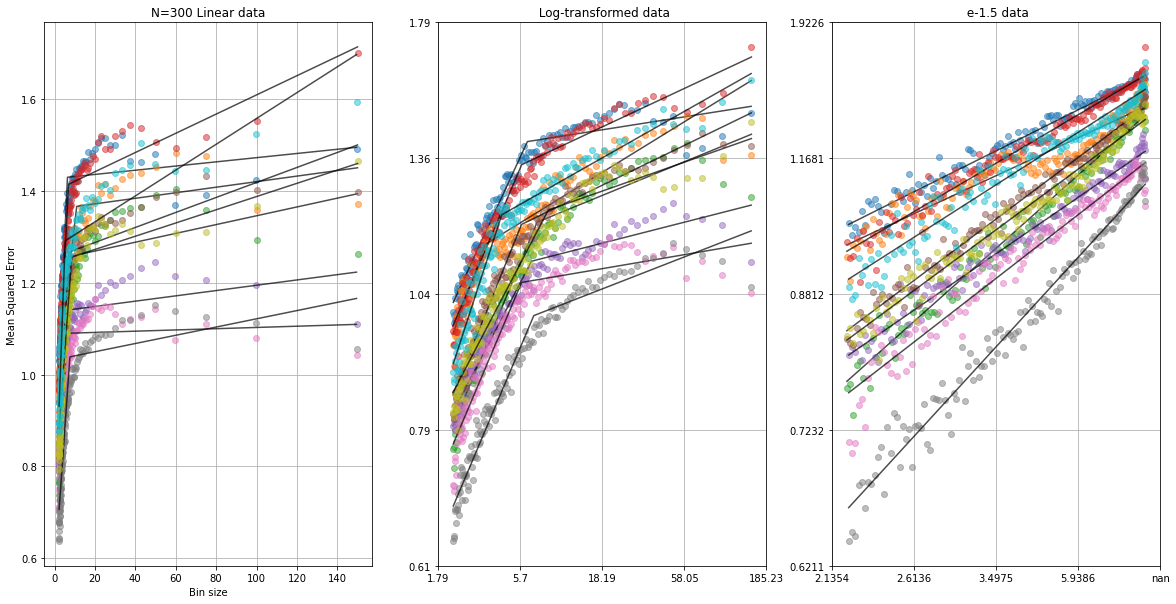

In [256]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

for rnum in list(datadict[tnum]):

    ax1.plot(datadict[tnum][rnum]['bin_sizes'], datadict[tnum][rnum]['mse'], 'o', alpha=0.5)
    ax1.plot(datadict[tnum][rnum]['space_lin'], datadict[tnum][rnum]['pwlr'], '-', color='k', alpha=0.7)
    
    ax2.plot(datadict[tnum][rnum]['bin_sizes_log'], datadict[tnum][rnum]['mse_log'], 'o', alpha=0.5)
    ax2.plot(datadict[tnum][rnum]['space_log'], datadict[tnum][rnum]['pwlr_log'], '-', color='k', alpha=0.7)
    
#     ax3.plot(np.flip(datadict[tnum][rnum]['bin_sizes_pwr']), np.flip(datadict[tnum][rnum]['mse_pwr']), 'o', alpha=0.5)
#     ax3.plot(np.flip(datadict[tnum][rnum]['space_pwr']), np.flip(datadict[tnum][rnum]['linfit_pwr']), '-', color='k', alpha=0.7)
    ax3.plot((datadict[tnum][rnum]['bin_sizes_pwr']),(datadict[tnum][rnum]['mse_pwr']), 'o', alpha=0.5)
    ax3.plot((datadict[tnum][rnum]['space_pwr']),(datadict[tnum][rnum]['linfit_pwr']), '-', color='k', alpha=0.7)

xmin, xmax = ax2.get_xlim()
xticks = np.linspace(xmin,xmax,5)
ax2.set_xticks(xticks)
ax2.set_xticklabels(np.exp(xticks).round(2))

ymin, ymax = ax2.get_ylim()
yticks = np.linspace(ymin,ymax,5)
ax2.set_yticks(yticks)
ax2.set_yticklabels(np.exp(yticks).round(2)) 

xmin, xmax = ax3.get_xlim()
ax3.set_xlim([xmax,xmin])
xticks = np.linspace(xmin,xmax,5)
ax3.set_xticks(xticks)
ax3.set_xticklabels(np.power(xticks,(1.0/pwrbase)).round(4))

ymin, ymax = ax3.get_ylim()
ax3.set_ylim([ymax,ymin])
yticks = np.linspace(ymin,ymax,5)
ax3.set_yticks(yticks)
ax3.set_yticklabels(np.power(yticks,(1.0/pwrbase)).round(4))

ax1.set_xlabel('Bin size')
ax1.set_ylabel('Mean Squared Error')
    
ax1.set_title('N=' + str(len(dist)) + ' Linear data')
ax2.set_title(' Log-transformed data')
ax3.set_title(' e-1.5 data')
ax1.grid(b=None, which='both', axis='both')
ax2.grid(b=None, which='both', axis='both')
ax3.grid(b=None, which='both', axis='both')
plt.show()

#

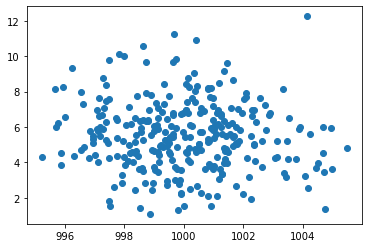

In [257]:
# # RANDOM TEST # #

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

dms_range = get_truncated_normal(mean=5.5, sd=2.0, low=1.0, upp=70.0)
rand_dms = dms_range.rvs(value)

#        spatial_res = np.ndarray(value,dtype=float)
#        spatial_res[:] = 1000
dist_range = get_truncated_normal(mean=1000.0, sd=2.0, low=200.0, upp=3000.0)
rand_dist = dist_range.rvs(value)

data = pd.DataFrame(np.array([rand_dms,rand_dist]).T, columns = ['DMSsw','distance'])
#        data = pd.DataFrame(np.array([rand_dms,spatial_res]).T, columns = ['DMSsw','distance'])
plt.scatter(data.distance,data.DMSsw)

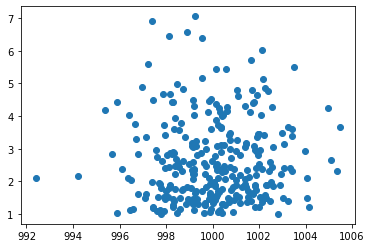

In [258]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

dms_range = get_truncated_normal(mean=1.0, sd=2.0, low=1.0, upp=70.0)
rand_dms = dms_range.rvs(value)

#        spatial_res = np.ndarray(value,dtype=float)
#        spatial_res[:] = 1000
dist_range = get_truncated_normal(mean=1000.0, sd=2.0, low=200.0, upp=3000.0)
rand_dist = dist_range.rvs(value)

data = pd.DataFrame(np.array([rand_dms,rand_dist]).T, columns = ['DMSsw','distance'])
#        data = pd.DataFrame(np.array([rand_dms,spatial_res]).T, columns = ['DMSsw','distance'])
plt.scatter(data.distance,data.DMSsw)

In [259]:
data

,DMSsw,distance
0,1.388435,1003.248980
1,1.807705,999.059970
2,3.864960,1000.133177
3,1.281793,999.657053
4,4.852939,1002.269003
...,...,...
295,2.456850,1000.129667
296,4.458014,999.842720
297,2.475235,999.735380
298,2.611432,998.741207


In [260]:
means = np.arange(10)
#%%
#values = [10,50,100,300,3000]                                                  # # number of data points (tnum)
values = [500]                                                                  # # number of data points (tnum)
vlslog_list = []
r2log_list = []
tlog_list = []
plog_list = []

datadict = c.OrderedDict()

for value in values:
#    plt.figure()
#    fig = plt.figure()
    tnum = 't_'+str(value)
    datadict[tnum] = {}
    for j in range(5):                                                        # # number of loop repeats (rnum)
        rnum = 'r_'+str(j)
        datadict[tnum][rnum] = {}
# # # ------------------------------------------------------------------------------------------------------------
        # # RANDOM TEST # #
        
        def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
            return truncnorm(
                (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
        
        dms_range = get_truncated_normal(mean=means[i], sd=2.0, low=1.0, upp=70.0)
#         dms_range = get_truncated_normal(mean=3.0, sd=2.0, low=1.0, upp=70.0)
#         dms_range = get_truncated_normal(mean=3.0, sd=0.1, low=2.9, upp=3.1)

#         rand_dms = dms_range.rvs(value)
        rand_dms =  np.random.rand(value)*5.0

#         dist_range = get_truncated_normal(mean=1000.0, sd=2.0, low=200.0, upp=3000.0)
#         rand_dist = dist_range.rvs(value)
        rand_dist = np.zeros(value)+1000.0
        
        data = pd.DataFrame(np.array([rand_dms,rand_dist]).T, columns = ['DMSsw','distance'])
#        data = pd.DataFrame(np.array([rand_dms,spatial_res]).T, columns = ['DMSsw','distance'])
                
# # # ------------------------------------------------------------------------------------------------------------
        # # SET INPUT PARAMETERS & NO. OF BINS # #
        
        DMS = data['DMSsw'].to_numpy()                                                  # # select DMS data column
        dist = (data['distance']/1000.0).to_numpy()                                     # # convert distance between measurements to km
        kmCov = np.cumsum(dist)                                                         # # cumulative transect distance
        maxlen = int(np.max(kmCov))                                                     # # max transect length as an integer
        maxbins = int(maxlen/2.2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        halflen = int(maxlen/2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        interpint = np.arange(1,halflen+2,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)
        interpint = np.arange(1,maxbins+1,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)

# # # ------------------------------------------------------------------------------------------------------------
        # # BIN, INTERPOLATE & MSE # # 
        
        processed = c.OrderedDict()
        processed['bin_sizes'] = float(maxlen)/interpint 
                                       # # no.of values to be averaged into bin
        for i in np.arange(len(interpint))+1:                                           # # for each bin size ( 1 : max km (rounded), every 1 ) (Can't start at bin_0 as 'bins' should be a positive integer, i.e. from bin_1 onward)
#            print i
            bin_number = 'bin_'+str(i)                                                  # # set bin_number as bin_ + i
            bin_dms = []                                                                # # empty temporary array
            bin_dist = []                                                               # # empty temporary array
            tempbin = np.array(pd.cut(data.index, i,labels=range(i)))                   # # temporary array for bin steps based on i in data.index
            for i in np.unique(tempbin):                                                # # for i in bin column values i.e. in bin_44, i = 0-43. Set to unique, to remove repetition of values which fill transect length (0,0,0,1,1,1,2,2,2,3,3,3,4,4,4...43,43,43 etc.)
                bin_dms.append(np.nanmean(DMS[np.where(tempbin == i)].astype('float')))       # # append average DMS values for bin
                bin_dist.append(np.nanmean(kmCov[np.where(tempbin == i)].astype('float')))    # # append average distances for bin
            processed[bin_number] = {}
            processed[bin_number]['dms_mean'] = bin_dms                                 # # bin average DMS
            processed[bin_number]['avdist'] = bin_dist                                  # # bin average distance
        
        print("Transect length:", maxlen, "km")
        print("No. interpolation intervals (BINS):", len(interpint))
        
        MSE = []
        
        for i in np.arange(len(interpint)-1)+2:                                         # # loop through bins 2-end inclusive. Start at bin_2, as can't interpolate the single value in bin_1
            # # INTERPOLATION # #
            x = np.array(processed['bin_'+str(i)]['avdist'])
            y = np.array(processed['bin_'+str(i)]['dms_mean'])                          # # DMS values averaged into bins
            interp_rows = np.where((kmCov > np.nanmin(x)) & (kmCov < np.nanmax(x)))[0]
            f = interp.interp1d(x,y)                                                    # # new function interpolate x & y
            DISTinterp = kmCov[interp_rows]
            DMSinterp = f(DISTinterp)                                                   # # use interpolation function returned by 'interp1d'
            # # MEAN SQUARED ERROR # #
            mse = np.nanmean((DMS[interp_rows] - DMSinterp)**2)                                      # # (dms original - dms intp) squared, then averaged to get one value per bin.
            MSE.append(mse)                                                             # # append to list for all bins
#            print 'Bin_',str(i), 'MSE', mse

#        plt.figure()
#        plt.scatter(kmCov,DMS, color = 'g', label = 'Observed', alpha = 0.5)
#        plt.scatter(DISTinterp,DMSinterp, label = bin_number + 'Interpolated', alpha = 0.5)
#        plt.xlabel('Distance (km)')
#        plt.ylabel('DMS (nM)')
#        plt.grid(b=None, which='major', axis='both')
#        plt.legend()
#        plt.show(block=False)
        
# # # ------------------------------------------------------------------------------------------------------------
        # # PIECEWISE LINEAR REGRESSION - LINEAR # #
        
        d = processed['bin_sizes'][1:]                                                  # # bin_sizes (minus the last value, as bin_1 not included)
        e = np.array(MSE[:])                                                                         # # mse values for bin_2 to bin_max
        space_lin = np.linspace(d.min(), d.max(), 1000)                                 # # new temp variable for an arbritrary 1000 points, linearly spaced between bin SIZES bin_2 and bin_max         
        my_pwlf = pwlf.PiecewiseLinFit(d, e)                                            # # use pwlf function PiecewiseLinFit
        
        # # FOR TRUNCATED VLS # #
        #u = d[0:507]                                           # # 197 for 20 km, 297 for 30 km, 397 for 40 km, 497 for 50 km, 997 for 100 km (507 for 51km)
        #v = e[0:507]
        #space_lin = np.linspace(u.min(), u.max(), 1000)                                # # for trunctated VLS
        #my_pwlf = pwlf.PiecewiseLinFit(u, v)                                           # # use pwlf function PiecewiseLinFit
        
        vls = my_pwlf.fit(2)                                                            # # find fit with prescribed no. of segments (x) (no. segments = no. inflections +1)
        pwlr = my_pwlf.predict(space_lin)                                               # # predicted PWLR
        
        print('linear VLS = ', vls[1])
        
        # # Get the slopes
        slopes = my_pwlf.calc_slopes()                                                  # # slope gradients of the two segmented linear regressions
        # # Get my model parameters
        Beta = my_pwlf.beta                                                             # # 3 beta values for the regressions
        # # Calculate the standard errors associated with each beta parameter
        se = my_pwlf.standard_errors()                                                  # # standard error for each beta parameter
        # # Calculate the R^2 value
        rsq = my_pwlf.r_squared()                                                       # # r squared value for the full regression
        
        # calculate the piecewise R^2 value
        R2values = np.zeros(my_pwlf.n_segments)
        for i in range(my_pwlf.n_segments):
            # segregate the data based on break point locations
            xmin = my_pwlf.fit_breaks[i]
            xmax = my_pwlf.fit_breaks[i+1]
            xtemp = my_pwlf.x_data
            ytemp = my_pwlf.y_data
            indtemp = np.where(xtemp >= xmin)
            xtemp = my_pwlf.x_data[indtemp]
            ytemp = my_pwlf.y_data[indtemp]
            indtemp = np.where(xtemp <= xmax)
            xtemp = xtemp[indtemp]
            ytemp = ytemp[indtemp]
        
            # predict for the new data
            yhattemp = my_pwlf.predict(xtemp)
        
            # calculate ssr
            E = yhattemp - ytemp                                                        # # residual vector
            ssr = np.dot(E, E)                                                          # # sum-of-squares of the residuals
        
            # calculate sst
            ybar = np.ones(ytemp.size) * np.mean(ytemp)                                 # # ybar = mean of vector y
            ydiff = ytemp - ybar
            sst = np.dot(ydiff, ydiff)                                                  # # total sum-of-squares
        
            R2values[i] = 1.0 - (ssr/sst)                                               # # coefficient of determination (R2)
        
        print('Segment R-squared values = ', R2values)
        
        datadict[tnum][rnum]['bin_sizes'] = d
        datadict[tnum][rnum]['mse'] = e
        datadict[tnum][rnum]['space_lin'] = space_lin
        datadict[tnum][rnum]['pwlr'] = pwlr
        datadict[tnum][rnum]['vls'] = vls

# # # ------------------------------------------------------------------------------------------------------------
        # # Find y (MSE) intercept at inflection point in PWLR - LINEAR # #
        
#        def find_nearest(array, value):
#            array = np.asarray(array)
#            idx = (np.abs(array - value)).argmin()
#            return array[idx]
#        
#        # # For 1st of ... inflections
#        inflec1 = find_nearest(space_lin, vls[1])
#        inflec1_index = list(space_lin).index(inflec1)
#        mse_intcpt1 = pwlr[inflec1_index]
#        print mse_intcpt1
#        
#        # # For 2nd of ... inflections
#        if len(vls) > 3:
#            inflec2 = find_nearest(space_lin, vls[2])
#            inflec2_index = list(space_lin).index(inflec2)
#            mse_intcpt2 = pwlr[inflec2_index]
#            print mse_intcpt2
#        else:
#            print 'Only 1 inflection'
        
# # # ------------------------------------------------------------------------------------------------------------
        # # Test significance of difference between the slopes (t-test & p-value) - LINEAR # #
        
#        # # For ONE inflection # #
#        if len(vls) <= 3:
#            a = pwlr[0:inflec1_index]
#            b = pwlr[inflec1_index:]
#            
#            t, p = ttest_ind(a, b, equal_var=False)
#            print 'One Inflection'
#            print("ttest_ind:            t = %g  p = %g" % (t, p))
#            if p < 0.05:
#                print 'SIGNIFICANT'
#            else:
#                print 'NOT SIGNIFICANT'
        
            # # VLS LINEAR SPACING # #
            
        d1 = np.log(d)
        e1 = np.log(e)
        
        z1 = np.polyfit(d1, e1, 4)
        fp1 = np.poly1d(z1)
        
        xnew1 = np.linspace(d1.min(), d1.max(), 1000)
        ynew1 = fp1(xnew1)

        my_pwlf1 = pwlf.PiecewiseLinFit(d1, e1)
        vls1 = my_pwlf1.fit(2)                                                          
        pwlr1 = my_pwlf1.predict(xnew1)                                            
        vls_inv = np.exp(vls1)
        
        #---------------------------------------------

        coefs = poly.polyfit(d1, e1, 4)
        ffit = poly.polyval(xnew1, coefs)
        
        #---------------------------------------------
        
        pwrbase = -1.5
        
        d2 = np.power(d,pwrbase)
        e2 = np.power(e,pwrbase)

        z2 = np.polyfit(d2, e2, 1)
        fp2 = np.poly1d(z2)
        
        xnew2 = np.linspace(d2.min(), d2.max(), 1000)
        ynew2 = fp2(xnew2)

        my_pwlf2 = pwlf.PiecewiseLinFit(d2, e2)
        vls2 = my_pwlf2.fit(2)                                                          
        pwlr2 = my_pwlf2.predict(xnew2)                                            
        vls_pinv = np.power(vls2,(1.0/pwrbase))
        
        datadict[tnum][rnum]['bin_sizes_log'] = d1
        datadict[tnum][rnum]['mse_log'] = e1
        datadict[tnum][rnum]['space_log'] = xnew1
        datadict[tnum][rnum]['pwlr_log'] = pwlr1
        datadict[tnum][rnum]['vls_log'] = vls1
        datadict[tnum][rnum]['vls_inv'] = vls_inv

        datadict[tnum][rnum]['bin_sizes_pwr'] = d2
        datadict[tnum][rnum]['mse_pwr'] = e2
        datadict[tnum][rnum]['space_pwr'] = xnew2
        datadict[tnum][rnum]['linfit_pwr'] = ynew2
        datadict[tnum][rnum]['pwlr_pwr'] = pwlr2
        datadict[tnum][rnum]['vls_pwr'] = vls2
        datadict[tnum][rnum]['vls_pinv'] = vls_pinv
        



Transect length: 500 km
No. interpolation intervals (BINS): 227
linear VLS =  6.209071610823377
Segment R-squared values =  [0.90962988 0.48370745]
Transect length: 500 km
No. interpolation intervals (BINS): 227
linear VLS =  5.9892111769293335
Segment R-squared values =  [0.88254021 0.31160752]
Transect length: 500 km
No. interpolation intervals (BINS): 227
linear VLS =  7.500549736417156
Segment R-squared values =  [0.87844216 0.26498907]
Transect length: 500 km
No. interpolation intervals (BINS): 227
linear VLS =  6.123053293844671
Segment R-squared values =  [0.90242691 0.44715149]
Transect length: 500 km
No. interpolation intervals (BINS): 227
linear VLS =  6.225587968983858
Segment R-squared values =  [0.89527927 0.48461788]


<ipython-input-261-f764fcd83f4e>:32: RuntimeWarning: invalid value encountered in power
  ax3.set_xticklabels(np.power(xticks,(1.0/pwrbase)).round(4))


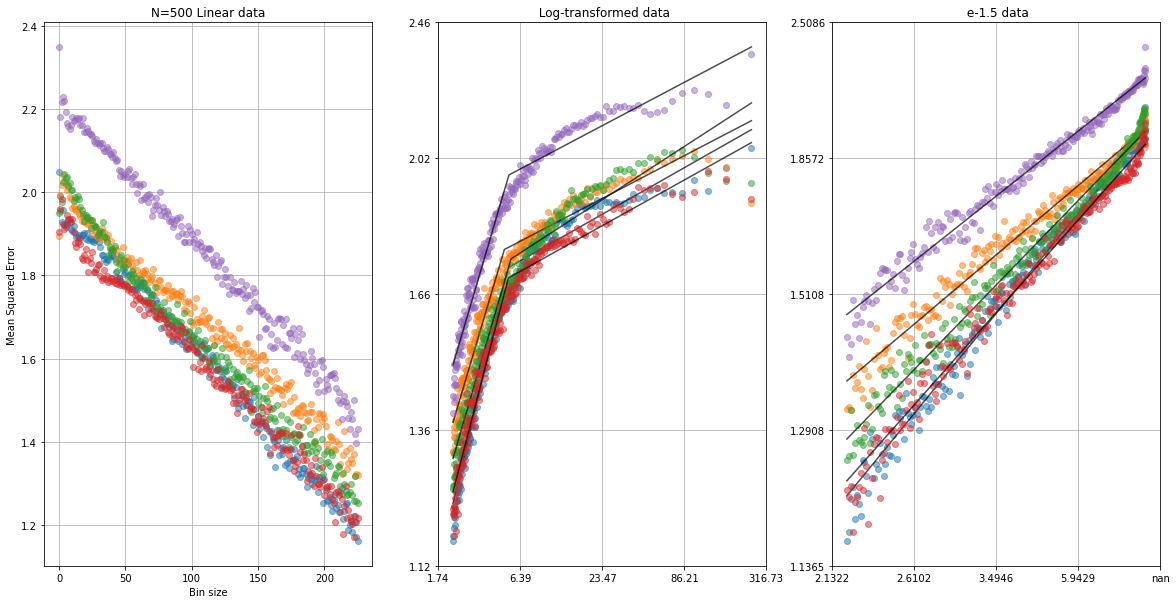

In [261]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

for rnum in list(datadict[tnum]):

    ax1.plot(datadict[tnum][rnum]['mse'], 'o', alpha=0.5)
#     ax1.plot(datadict[tnum][rnum]['space_lin'], datadict[tnum][rnum]['pwlr'], '-', color='k', alpha=0.7)
#     ax1.plot(datadict[tnum][rnum]['bin_sizes'], datadict[tnum][rnum]['mse'], 'o', alpha=0.5)
#     ax1.plot(datadict[tnum][rnum]['space_lin'], datadict[tnum][rnum]['pwlr'], '-', color='k', alpha=0.7)
    
    ax2.plot(datadict[tnum][rnum]['bin_sizes_log'], datadict[tnum][rnum]['mse_log'], 'o', alpha=0.5)
    ax2.plot(datadict[tnum][rnum]['space_log'], datadict[tnum][rnum]['pwlr_log'], '-', color='k', alpha=0.7)
    
#     ax3.plot(np.flip(datadict[tnum][rnum]['bin_sizes_pwr']), np.flip(datadict[tnum][rnum]['mse_pwr']), 'o', alpha=0.5)
#     ax3.plot(np.flip(datadict[tnum][rnum]['space_pwr']), np.flip(datadict[tnum][rnum]['linfit_pwr']), '-', color='k', alpha=0.7)
    ax3.plot((datadict[tnum][rnum]['bin_sizes_pwr']),(datadict[tnum][rnum]['mse_pwr']), 'o', alpha=0.5)
    ax3.plot((datadict[tnum][rnum]['space_pwr']),(datadict[tnum][rnum]['linfit_pwr']), '-', color='k', alpha=0.7)

xmin, xmax = ax2.get_xlim()
xticks = np.linspace(xmin,xmax,5)
ax2.set_xticks(xticks)
ax2.set_xticklabels(np.exp(xticks).round(2))

ymin, ymax = ax2.get_ylim()
yticks = np.linspace(ymin,ymax,5)
ax2.set_yticks(yticks)
ax2.set_yticklabels(np.exp(yticks).round(2)) 

xmin, xmax = ax3.get_xlim()
ax3.set_xlim([xmax,xmin])
xticks = np.linspace(xmin,xmax,5)
ax3.set_xticks(xticks)
ax3.set_xticklabels(np.power(xticks,(1.0/pwrbase)).round(4))

ymin, ymax = ax3.get_ylim()
ax3.set_ylim([ymax,ymin])
yticks = np.linspace(ymin,ymax,5)
ax3.set_yticks(yticks)
ax3.set_yticklabels(np.power(yticks,(1.0/pwrbase)).round(4))

ax1.set_xlabel('Bin size')
ax1.set_ylabel('Mean Squared Error')
    
ax1.set_title('N=' + str(len(dist)) + ' Linear data')
ax2.set_title(' Log-transformed data')
ax3.set_title(' e-1.5 data')
ax1.grid(b=None, which='both', axis='both')
ax2.grid(b=None, which='both', axis='both')
ax3.grid(b=None, which='both', axis='both')
plt.show()

#

In [262]:
dms_range = get_truncated_normal(mean=3.0, sd=0.1, low=2.9, upp=3.1)

rand_dms = dms_range.rvs(value)

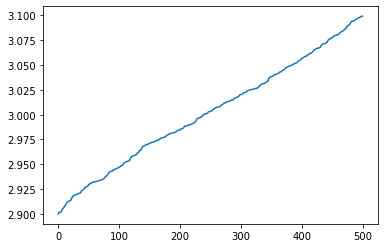

In [263]:
plt.plot(np.sort(rand_dms))

In [264]:
dms_range

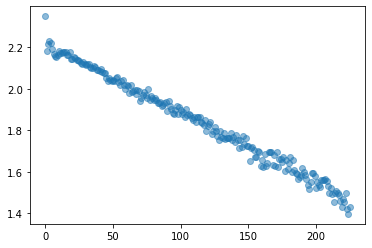

In [265]:
plt.plot(datadict[tnum][rnum]['mse'], 'o', alpha=0.5)

# George - Tom, look at this bit

Text(0, 0.5, 'bin size')

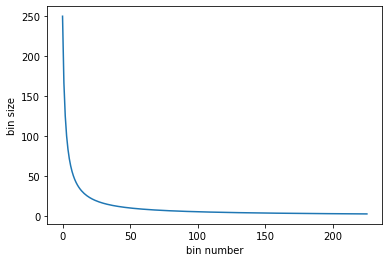

In [266]:
plt.plot(datadict[tnum][rnum]['bin_sizes'])
plt.xlabel('bin number')
plt.ylabel('bin size')

Text(0, 0.5, 'MSE')

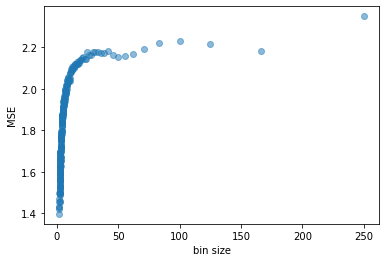

In [267]:
plt.plot(datadict[tnum][rnum]['bin_sizes'], datadict[tnum][rnum]['mse'], 'o', alpha=0.5)
plt.xlabel('bin size')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

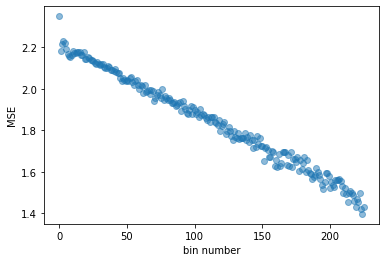

In [268]:
plt.plot(datadict[tnum][rnum]['mse'], 'o', alpha=0.5)
plt.xlabel('bin number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

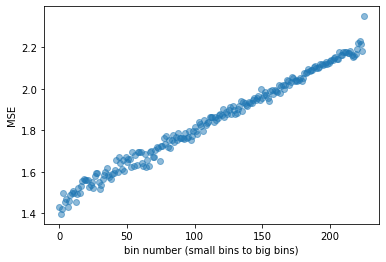

In [269]:
plt.plot(np.flip(datadict[tnum][rnum]['mse']), 'o', alpha=0.5)
plt.xlabel('bin number (small bins to big bins)')
plt.ylabel('MSE')

# END George - Tom, look at this bit

# Real data

In [270]:
x0 = np.load('/Users/ph290/Downloads/246_Bell11t0_300binsizes.npy')
y0 = np.load('/Users/ph290/Downloads/246_Bell11t0_300mse.npy')

x1 = np.load('/Users/ph290/Downloads/246_Bell11t1_300binsizes.npy')
y1 = np.load('/Users/ph290/Downloads/246_Bell11t1_300mse.npy')




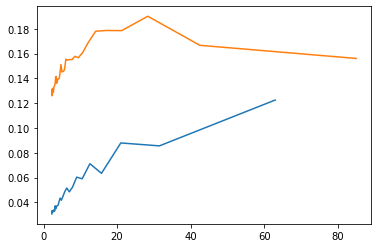

In [271]:
plt.plot(x0,y0)
plt.plot(x1,y1)

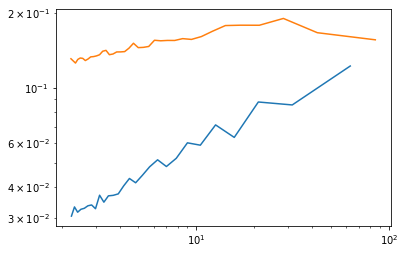

In [272]:
plt.loglog(x0,y0)
plt.loglog(x1,y1)

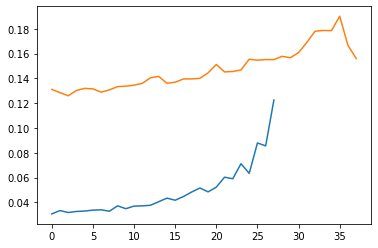

In [273]:
plt.plot(np.flip(y0))
plt.plot(np.flip(y1))

# Real  full process
note - MSE has the same units of measurement as the square of the quantity being estimated, hence why we often use RMSE

In [274]:
x_in = np.load('/Users/ph290/Downloads/246_Bell11_distances_m.npy')
y_in = np.load('/Users/ph290/Downloads/246_Bell11_DMSsw.npy')
# loc = np.where(x_in < )
data = pd.DataFrame(np.array([y_in,x_in]).T, columns = ['DMSsw','distance'])

In [275]:
# # # --------------------------------------------------------------------
        # # SET INPUT PARAMETERS & NO. OF BINS # #

DMS = data['DMSsw'].to_numpy()                                                  # # select DMS data column
dist = (data['distance']/1000.0).to_numpy()                                     # # convert distance between measurements to km
kmCov = np.cumsum(dist)                                                         # # cumulative transect distance
maxlen = int(np.max(kmCov))                                                     # # max transect length as an integer
maxbins = int(maxlen/2.2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        halflen = int(maxlen/2)                                                         # # required for later calcs. MSE=0 where bin number > (transect length)/2
#        interpint = np.arange(1,halflen+2,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)
interpint = np.arange(1,maxbins+1,1,dtype=np.int)                               # # set range & intervals as: 1km to halflen +2, stepping every 1km. (+1 to create 1 extra bin (because losing bin_0) and +1 to include the max value as the end point = +2)

# # # ------------------------------------------------------------------------------------------------------------
# # BIN, INTERPOLATE & MSE # # 

processed = c.OrderedDict()
processed['bin_sizes'] = float(maxlen)/interpint 
                               # # no.of values to be averaged into bin
for i in np.arange(len(interpint))+1:                                           # # for each bin size ( 1 : max km (rounded), every 1 ) (Can't start at bin_0 as 'bins' should be a positive integer, i.e. from bin_1 onward)
#            print i
    bin_number = 'bin_'+str(i)                                                  # # set bin_number as bin_ + i
    bin_dms = []                                                                # # empty temporary array
    bin_dist = []                                                               # # empty temporary array
    tempbin = np.array(pd.cut(data.index, i,labels=range(i)))                   # # temporary array for bin steps based on i in data.index
    for i in np.unique(tempbin):                                                # # for i in bin column values i.e. in bin_44, i = 0-43. Set to unique, to remove repetition of values which fill transect length (0,0,0,1,1,1,2,2,2,3,3,3,4,4,4...43,43,43 etc.)
        bin_dms.append(np.nanmean(DMS[np.where(tempbin == i)].astype('float')))       # # append average DMS values for bin
        bin_dist.append(np.nanmean(kmCov[np.where(tempbin == i)].astype('float')))    # # append average distances for bin
    processed[bin_number] = {}
    processed[bin_number]['dms_mean'] = bin_dms                                 # # bin average DMS
    processed[bin_number]['avdist'] = bin_dist                                  # # bin average distance

print("Transect length:", maxlen, "km")
print("No. interpolation intervals (BINS):", len(interpint))

MSE = []

for i in np.arange(len(interpint)-1)+2:                                         # # loop through bins 2-end inclusive. Start at bin_2, as can't interpolate the single value in bin_1
    # # INTERPOLATION # #
    x = np.array(processed['bin_'+str(i)]['avdist'])
    y = np.array(processed['bin_'+str(i)]['dms_mean'])                          # # DMS values averaged into bins
    interp_rows = np.where((kmCov > np.nanmin(x)) & (kmCov < np.nanmax(x)))[0]
    f = interp.interp1d(x,y)                                                    # # new function interpolate x & y
    DISTinterp = kmCov[interp_rows]
    DMSinterp = f(DISTinterp)                                                   # # use interpolation function returned by 'interp1d'
    # # MEAN SQUARED ERROR # #
    mse = np.nanmean((DMS[interp_rows] - DMSinterp)**2)                                      # # (dms original - dms intp) squared, then averaged to get one value per bin.
    MSE.append(mse)                                                             # # append to list for all bins
#            print 'Bin_',str(i), 'MSE', mse

#        plt.figure()
#        plt.scatter(kmCov,DMS, color = 'g', label = 'Observed', alpha = 0.5)
#        plt.scatter(DISTinterp,DMSinterp, label = bin_number + 'Interpolated', alpha = 0.5)
#        plt.xlabel('Distance (km)')
#        plt.ylabel('DMS (nM)')
#        plt.grid(b=None, which='major', axis='both')
#        plt.legend()
#        plt.show(block=False)

# # # ------------------------------------------------------------------------------------------------------------
# # PIECEWISE LINEAR REGRESSION - LINEAR # #

d = processed['bin_sizes'][1:]                                                  # # bin_sizes (minus the last value, as bin_1 not included)
e = np.array(MSE[:])                                                                         # # mse values for bin_2 to bin_max
space_lin = np.linspace(d.min(), d.max(), 1000)                                 # # new temp variable for an arbritrary 1000 points, linearly spaced between bin SIZES bin_2 and bin_max         
my_pwlf = pwlf.PiecewiseLinFit(d, e)                                            # # use pwlf function PiecewiseLinFit

# # FOR TRUNCATED VLS # #
#u = d[0:507]                                           # # 197 for 20 km, 297 for 30 km, 397 for 40 km, 497 for 50 km, 997 for 100 km (507 for 51km)
#v = e[0:507]
#space_lin = np.linspace(u.min(), u.max(), 1000)                                # # for trunctated VLS
#my_pwlf = pwlf.PiecewiseLinFit(u, v)                                           # # use pwlf function PiecewiseLinFit

vls = my_pwlf.fit(2)                                                            # # find fit with prescribed no. of segments (x) (no. segments = no. inflections +1)
pwlr = my_pwlf.predict(space_lin)                                               # # predicted PWLR

print('linear VLS = ', vls[1])

# # Get the slopes
slopes = my_pwlf.calc_slopes()                                                  # # slope gradients of the two segmented linear regressions
# # Get my model parameters
Beta = my_pwlf.beta                                                             # # 3 beta values for the regressions
# # Calculate the standard errors associated with each beta parameter
se = my_pwlf.standard_errors()                                                  # # standard error for each beta parameter
# # Calculate the R^2 value
rsq = my_pwlf.r_squared()                                                       # # r squared value for the full regression

# calculate the piecewise R^2 value
R2values = np.zeros(my_pwlf.n_segments)
for i in range(my_pwlf.n_segments):
    # segregate the data based on break point locations
    xmin = my_pwlf.fit_breaks[i]
    xmax = my_pwlf.fit_breaks[i+1]
    xtemp = my_pwlf.x_data
    ytemp = my_pwlf.y_data
    indtemp = np.where(xtemp >= xmin)
    xtemp = my_pwlf.x_data[indtemp]
    ytemp = my_pwlf.y_data[indtemp]
    indtemp = np.where(xtemp <= xmax)
    xtemp = xtemp[indtemp]
    ytemp = ytemp[indtemp]

    # predict for the new data
    yhattemp = my_pwlf.predict(xtemp)

    # calculate ssr
    E = yhattemp - ytemp                                                        # # residual vector
    ssr = np.dot(E, E)                                                          # # sum-of-squares of the residuals

    # calculate sst
    ybar = np.ones(ytemp.size) * np.mean(ytemp)                                 # # ybar = mean of vector y
    ydiff = ytemp - ybar
    sst = np.dot(ydiff, ydiff)                                                  # # total sum-of-squares

    R2values[i] = 1.0 - (ssr/sst)                                               # # coefficient of determination (R2)

print('Segment R-squared values = ', R2values)

#         datadict[tnum][rnum]['bin_sizes'] = d
#         datadict[tnum][rnum]['mse'] = e
#         datadict[tnum][rnum]['space_lin'] = space_lin
#         datadict[tnum][rnum]['pwlr'] = pwlr
#         datadict[tnum][rnum]['vls'] = vls


d_std = d.copy()
e_std = e.copy()
rmse_std = np.power(e.copy(),0.5)
space_lin_std = space_lin.copy()
pwlr_std = pwlr.copy()
vls_std = vls.copy()

d1 = np.log(d)
e1 = np.log(e)

z1 = np.polyfit(d1, e1, 4)
fp1 = np.poly1d(z1)

xnew1 = np.linspace(d1.min(), d1.max(), 1000)
ynew1 = fp1(xnew1)

my_pwlf1 = pwlf.PiecewiseLinFit(d1, e1)
vls1 = my_pwlf1.fit(2)                                                          
pwlr1 = my_pwlf1.predict(xnew1)                                            
vls_inv = np.exp(vls1)

#---------------------------------------------

coefs = poly.polyfit(d1, e1, 4)
ffit = poly.polyval(xnew1, coefs)

#---------------------------------------------

pwrbase = -1.5

d2 = np.power(d,pwrbase)
e2 = np.power(e,pwrbase)

z2 = np.polyfit(d2, e2, 1)
fp2 = np.poly1d(z2)

xnew2 = np.linspace(d2.min(), d2.max(), 1000)
ynew2 = fp2(xnew2)

my_pwlf2 = pwlf.PiecewiseLinFit(d2, e2)
vls2 = my_pwlf2.fit(2)                                                          
pwlr2 = my_pwlf2.predict(xnew2)                                            
vls_pinv = np.power(vls2,(1.0/pwrbase))

#         datadict[tnum][rnum]['bin_sizes_log'] = d1
#         datadict[tnum][rnum]['mse_log'] = e1
#         datadict[tnum][rnum]['space_log'] = xnew1
#         datadict[tnum][rnum]['pwlr_log'] = pwlr1
#         datadict[tnum][rnum]['vls_log'] = vls1
#         datadict[tnum][rnum]['vls_inv'] = vls_inv

#         datadict[tnum][rnum]['bin_sizes_pwr'] = d2
#         datadict[tnum][rnum]['mse_pwr'] = e2
#         datadict[tnum][rnum]['space_pwr'] = xnew2
#         datadict[tnum][rnum]['linfit_pwr'] = ynew2
#         datadict[tnum][rnum]['pwlr_pwr'] = pwlr2
#         datadict[tnum][rnum]['vls_pwr'] = vls2
#         datadict[tnum][rnum]['vls_pinv'] = vls_pinv
        

d_log = d1.copy()
e_log = e1.copy()
rmse_log = np.log(np.power(e,0.5))
space_lin_log = xnew1.copy()
pwlr_log = pwlr1.copy()
vls_log = vls1.copy()

d_pwr = d2.copy()
e_pwr = e2.copy()
rmse_pwr = np.power((np.power(e,0.5)),(1.0/(-1.5)))

space_lin_pwr = xnew2.copy()
pwlr_pwr = pwlr2.copy()
vls_pwr = vls2.copy()

Transect length: 4627 km
No. interpolation intervals (BINS): 2103
linear VLS =  62.033229655154855
Segment R-squared values =  [0.96541631 0.94371244]


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/pwlf/pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \


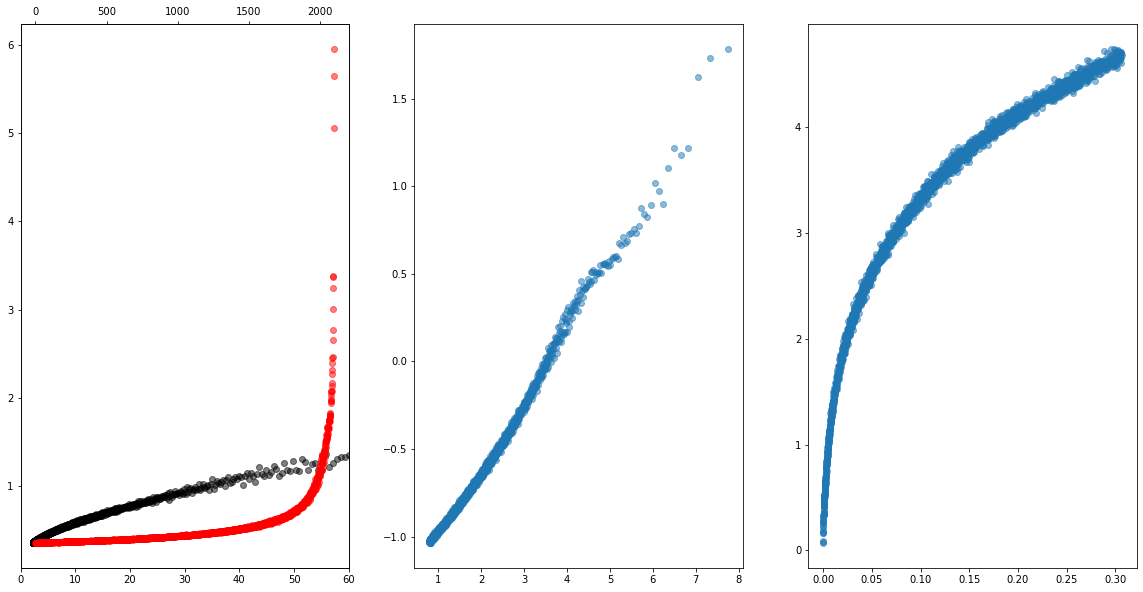

In [299]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,10))


ax1.plot(d_std,e_std, 'o',color='k', alpha=0.5)

# ax1.plot(d_std,rmse_std, 'o', alpha=0.5)
ax1b=ax1.twiny()
ax1b.plot(np.flip(np.arange(len(e_std))),e_std, 'o',color='r', alpha=0.5)
ax1.set_xlim([0,60])

#     ax1.plot(datadict[tnum][rnum]['space_lin'], datadict[tnum][rnum]['pwlr'], '-', color='k', alpha=0.7)
#     ax1.plot(datadict[tnum][rnum]['bin_sizes'], datadict[tnum][rnum]['mse'], 'o', alpha=0.5)
#     ax1.plot(datadict[tnum][rnum]['space_lin'], datadict[tnum][rnum]['pwlr'], '-', color='k', alpha=0.7)

ax2.plot(d_log,e_log, 'o', alpha=0.5)
# ax2.plot(datadict[tnum][rnum]['space_log'], datadict[tnum][rnum]['pwlr_log'], '-', color='k', alpha=0.7)

#     ax3.plot(np.flip(datadict[tnum][rnum]['bin_sizes_pwr']), np.flip(datadict[tnum][rnum]['mse_pwr']), 'o', alpha=0.5)
#     ax3.plot(np.flip(datadict[tnum][rnum]['space_pwr']), np.flip(datadict[tnum][rnum]['linfit_pwr']), '-', color='k', alpha=0.7)
ax3.plot(d_pwr,e_pwr, 'o', alpha=0.5)
# ax3.set_xlim([0.4,0.0])
# ax3.set_ylim([5,0.0])
# ax3.plot((datadict[tnum][rnum]['space_pwr']),(datadict[tnum][rnum]['linfit_pwr']), '-', color='k', alpha=0.7)


No handles with labels found to put in legend.


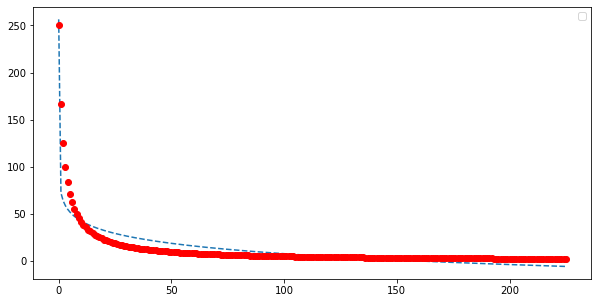

In [195]:
from scipy.optimize import curve_fit

X,y = np.arange(len(d_std)),(d_std)

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

target_func = func_powerlaw

popt, pcov = curve_fit(target_func, X, y)

plt.figure(figsize=(10, 5))
plt.plot(X, target_func(X, *popt), '--')
plt.plot(X, y, 'ro')
plt.legend()
plt.show()

# plt.scatter(x,y)

<ipython-input-187-8035a973575f>:2: RuntimeWarning: divide by zero encountered in power
  y = np.power(x,-1.5)


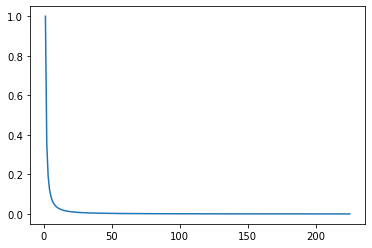

In [187]:
x = np.arange(len(d_std))
y = np.power(x,-1.5)
plt.plot(x,y)